# 060524 SI Figures

In [1]:
import sys
# add path for my packages
sys.path.append('C:\\Users\\katsuya2\\OneDrive - University of Illinois - Urbana\\Documents\\Python Scripts\\my_packages')
import re
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import ast
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.stats import norm
import scipy.stats as stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from tqdm import tqdm
from pathlib import Path
from glob import glob
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, make_scorer, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


%precision 3
%matplotlib inline

# use my matplotlib style
style_p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/my_packages")
plt.style.use(Path(style_p, 'my_rc_setting.mplstyle'))

import Lorentzian

# Figure S1

In [6]:
# plot UV_vis spectra
p_data = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/projects/AuNR_DA/datasets")
uvvis_data = pd.read_csv(Path(p_data, 'uvvis_AuNR25x85.csv'))
TEM_data = pd.read_csv(Path(p_data, 'tem_AuNR25x85.csv'))

Text(0, 0.5, 'Absorbance (a. u.)')

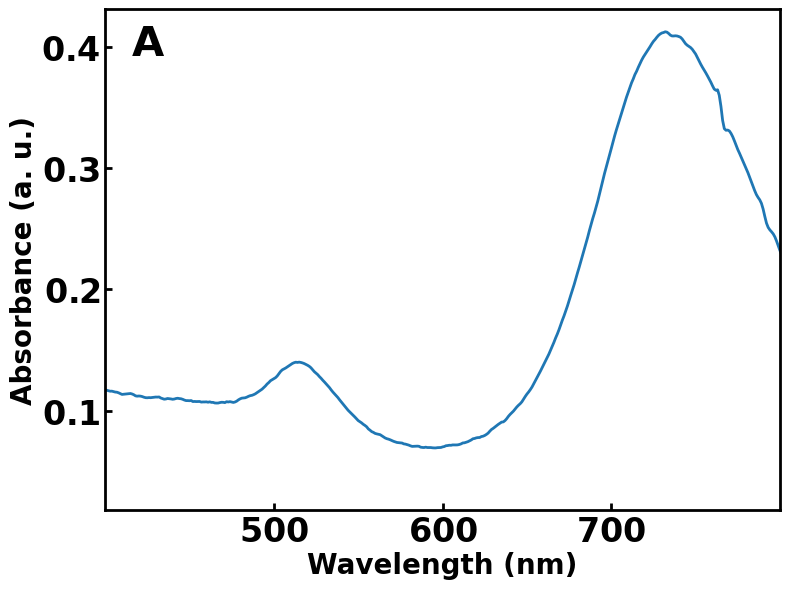

In [7]:
fig, ax = plt.subplots()
ax.plot(uvvis_data['wav'], uvvis_data['absorbance'], lw=2)
ax.text(0.04, 0.97, 'A', ha='left', va='top', transform=ax.transAxes, fontsize=30)
ax.set_xlim(400, 800)
ax.set_xticks([500, 600, 700])
# ax.set_yticks([0, 0.05, 0.1, 0.15])
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorbance (a. u.)')

# ax.vlines(733, 0, 0.5, color='b', ls='--', lw=1)
# plt.savefig("ITO_FigureS1A.svg", format="svg", dpi=300)

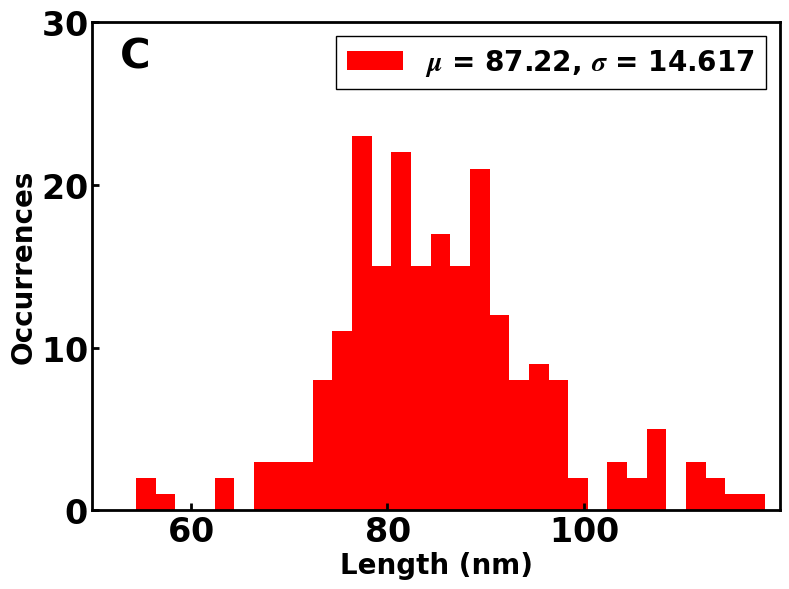

In [8]:
width = TEM_data['Minor']
length = TEM_data['Major']

fig, ax = plt.subplots()
binwidth = 2
# target = glass_exp_data['eres']
target = length
mean = np.mean(target)
std = np.std(target)
target_divided_mean = target/mean
ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), 
        color='r', label=f'$\mu$ = {round(mean, 3)}, $\sigma$ = {round(std, 3)}')

# ax.vlines(0, 0, 35, color='k', ls='--', lw=2)
# ax.text(0.01, 0.99, f'binwidth={binwidth}', ha='left', va='top', transform=ax.transAxes, fontsize=12)
ax.text(0.04, 0.97, 'C', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Length (nm)')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, 30)
ax.set_xlim(50, 120)

ax.set_xticks([60, 80, 100])
ax.set_yticks([0, 10, 20, 30])

ax.legend(fontsize=20)

# plt.savefig("ITO_FigureS1C.svg", format="svg", dpi=300)

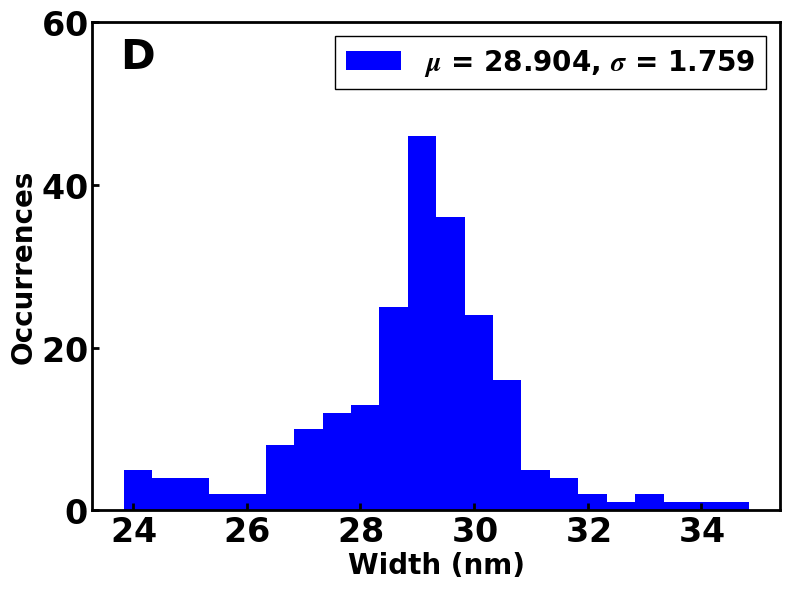

In [9]:
fig, ax = plt.subplots()
binwidth = 0.5
target = width
mean = np.mean(target)
std = np.std(target)
target_divided_mean = target/mean
ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), 
        color='b', label=f'$\mu$ = {round(mean, 3)}, $\sigma$ = {round(std, 3)}')

# ax.vlines(0, 0, 35, color='k', ls='--', lw=2)
# ax.text(0.01, 0.99, f'binwidth={binwidth}', ha='left', va='top', transform=ax.transAxes, fontsize=12)
ax.text(0.04, 0.97, 'D', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Width (nm)')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, 60)
# ax.set_xlim(0.8, 1.2)

ax.set_xticks([24, 26, 28, 30, 32, 34])
ax.set_yticks([0, 20, 40, 60])

ax.legend(fontsize=20)

# plt.savefig("ITO_FigureS1D.svg", format="svg", dpi=300)

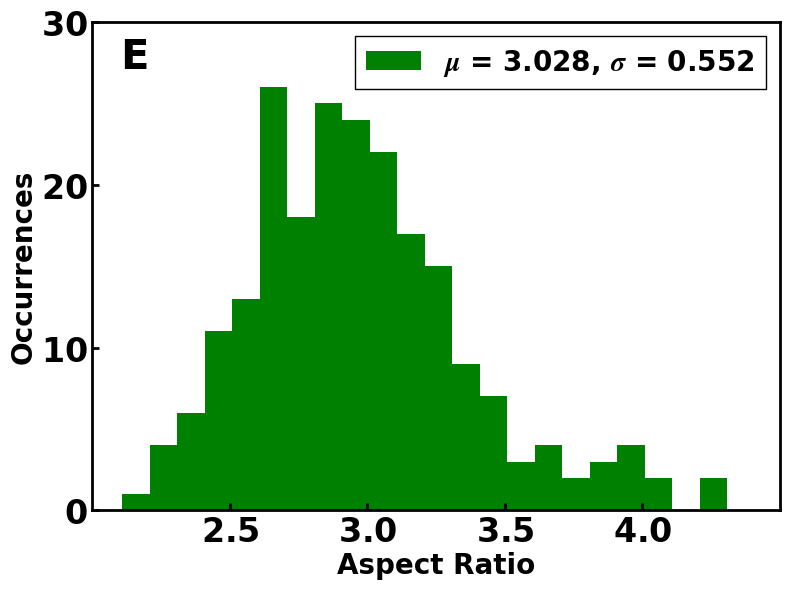

In [10]:
fig, ax = plt.subplots()
binwidth = 0.1
# target = glass_exp_data['eres']
target = length/width
mean = np.mean(target)
std = np.std(target)
target_divided_mean = target/mean
ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), 
        color='g', label=f'$\mu$ = {round(mean, 3)}, $\sigma$ = {round(std, 3)}')

# ax.vlines(0, 0, 35, color='k', ls='--', lw=2)
# ax.text(0.01, 0.99, f'binwidth={binwidth}', ha='left', va='top', transform=ax.transAxes, fontsize=12)
ax.text(0.04, 0.97, 'E', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Aspect Ratio')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, 30)
ax.set_xlim(2, 4.5)

ax.set_xticks([2.5, 3.0, 3.5, 4.0])
ax.set_yticks([0, 10, 20, 30])

ax.legend(fontsize=20)

# plt.savefig("ITO_FigureS1E.svg", format="svg", dpi=300)

# Figure S2

In [ ]:
p_glass = Path('Z:/Katsuya Shiratori/004_coding/python/ITO_project/zhenyang_glass_analysis')
glass_exp_data = pd.read_csv(Path(p_glass, '100323_ZJ_exp_glass_final.csv'))
glass_exp_data['exp_ene'] = [ast.literal_eval(df) for df in glass_exp_data['exp_ene']]
glass_exp_data['exp_dfs'] = [ast.literal_eval(df) for df in glass_exp_data['exp_dfs']]
glass_exp_data['fitting'] = [ast.literal_eval(df) for df in glass_exp_data['fitting']]
print(glass_exp_data.shape)

p_ito = Path('Z:/Katsuya Shiratori/004_coding/python/ITO_project/zhenyang_ito_analysis')
ito_exp_data = pd.read_csv(Path(p_ito, '100323_ZJ_exp_ito_final.csv'))
ito_exp_data['exp_ene'] = [ast.literal_eval(df) for df in ito_exp_data['exp_ene']]
ito_exp_data['exp_dfs'] = [ast.literal_eval(df) for df in ito_exp_data['exp_dfs']]
ito_exp_data['fitting'] = [ast.literal_eval(df) for df in ito_exp_data['fitting']]
print(ito_exp_data.shape)

# particles on glass outliers particles 47, 67, 71
outliers_particles = [47, 67, 71]
glass_exp_data = glass_exp_data.drop(outliers_particles)
glass_exp_data.reset_index(drop=True, inplace=True)
print(glass_exp_data.shape)

In [ ]:
# difference in eres
fig, ax = plt.subplots()
binwidth = 0.03
target = glass_exp_data['eres']
target_avg = target.mean()
terget_std = target.std()

ylim = 30
ax.vlines(target_avg, 0, ylim, color='k', ls='--', lw=2)
ax.vlines(terget_std*2 + target_avg, 0, ylim, color='k', ls='-', lw=2)
ax.vlines(-terget_std*2 + target_avg, 0, ylim, color='k', ls='-', lw=2)

ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), color='red', alpha=0.7, label=f'AuNRs on ITO: {len(target)} particles')
# ax.text(0.01, 0.99, f'binwidth={binwidth}', ha='left', va='top', transform=ax.transAxes, fontsize=12)

ax.text(-terget_std*2 + target_avg, 0.5, f'-2$\sigma$: {round(-terget_std*2 + target_avg, 2)}', fontsize=20)
ax.text(terget_std*2 + target_avg, 0.5, f'2$\sigma$: {round(terget_std*2 + target_avg, 2)}', fontsize=20)
ax.text(target_avg, 0.5, f'$\mu$: {round(target_avg, 2)}', fontsize=20)

ax.text(0.04, 0.97, 'A', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Eres (eV)')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, ylim)
ax.set_xlim(1.4, 2.0)
ax.set_xticks([1.5, 1.7, 1.9])
ax.legend(fontsize=20)

In [ ]:
p = Path("Z:/Katsuya Shiratori/001_experiments/221111_ellipsometer_analysis/Nina models/")
ECI = pd.read_csv(Path(p, 'ECI_ITO.csv'))
glass = pd.read_csv(Path(p, '100623_ECI_ITO_glass.csv'))

print(ECI[(ECI['Wavelength'] > 400) & (ECI['Wavelength'] < 1000)]['n'].mean())
print(ECI[(ECI['Wavelength'] > 400) & (ECI['Wavelength'] < 1000)]['k'].mean())

ECI['eV'] = 1240 / ECI['Wavelength']
glass['eV'] = 1240 / glass['Wavelength']
ECI.head()

In [ ]:
fig, ax1 = plt.subplots()

# Eres distribution from AuNRs on ITO
# ene_low = 1.64
# ene_high = 1.98

ene_low = 1.524
ene_high = 1.9

ax2 = ax1.twinx()

ECI_ITO_nmean = ECI[(ECI['eV'] > ene_low) & (ECI['eV'] < ene_high)]['n'].mean()
ECI_ITO_kmean = ECI[(ECI['eV'] > ene_low) & (ECI['eV'] < ene_high)]['k'].mean()

glass_ITO_nmean = glass[(glass['eV'] > ene_low) & (glass['eV'] < ene_high)]['n'].mean()
glass_ITO_kmean = glass[(glass['eV'] > ene_low) & (glass['eV'] < ene_high)]['k'].mean()

ax1.plot(ECI['eV'], ECI['n'], c='r', lw=2, label=f"ITO n, mean={round(ECI_ITO_nmean, 2)}")
ax2.plot(ECI['eV'], ECI['k'], c='b', lw=2, label=f"k, mean={round(ECI_ITO_kmean, 2)}")

ax1.plot(glass['eV'], glass['n'], c='r', ls='--', lw=2, label=f"glass n, mean={round(glass_ITO_nmean, 2)}")
ax2.plot(glass['eV'], glass['k'], c='b', ls='--', lw=2, label=f"k, mean={round(glass_ITO_kmean, 2)}")

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel("n")
ax2.set_ylabel("k")
ax1.set_xlim(ene_low, ene_high)
# ax1.set_xlim(1.4, 2.0)
ax1.set_xticks([1.6, 1.7, 1.8])
ax1.set_ylim(1.4, 2.4)
ax2.set_ylim(-0.01, 0.2)

ax2.spines['left'].set_color('r')
ax2.spines['right'].set_color('b')
ax1.tick_params(axis='y', colors='r')
ax2.tick_params(axis='y', colors='b')
ax1.yaxis.label.set_color('r')
ax2.yaxis.label.set_color('b')

ax1.text(0.04, 0.97, 'B', ha='left', va='top', transform=ax1.transAxes, fontsize=30)
ax1.legend(fontsize=20)

print(round(ECI_ITO_kmean, 7), round(glass_ITO_kmean, 7))
# plt.savefig("ITO_FigureS2B.svg", format="svg", dpi=300)